In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from skimage.transform import resize
from skimage.restoration import inpaint
from medpy.filter.smoothing import anisotropic_diffusion

from train_utils import get_imgs

In [23]:
task = 'inpainting'
img_name = 'skin_lesion'
imsize = -1

sigma = 0.1
factor = 2
enforce_div32 = True

PSNR: 25.600407927151142, SSIM: 0.8790011988784006


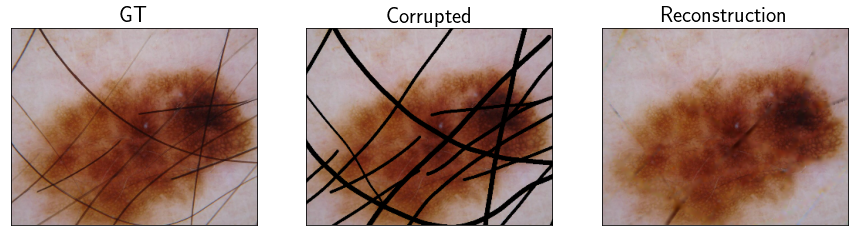

In [39]:
imgs = get_imgs(img_name, task, imsize=imsize, sigma=sigma, domain=img_name, factor=factor, enforce_div32=enforce_div32)

if task == 'denoising':
    img_gt = imgs['gt'][0]
    img_corrupted = imgs['noisy'][0]
    multichannel = False
    recon = anisotropic_diffusion(imgs['noisy'][0])
elif task == 'super_resolution':
    img_gt = imgs['HR_np'][0]
    img_corrupted = imgs['LR_np'][0]
    multichannel = False
    shape = imgs['LR_np'].shape
    recon = resize(imgs['LR_np'][0], (shape[1]*2, shape[2]*2), order=1)
elif task == 'inpainting':
    img_gt = np.moveaxis(imgs['gt'], 0, -1)
    img_corrupted = np.moveaxis(imgs['gt'] * imgs['mask'], 0, -1)
    multichannel = True
    mask = -1 * imgs['mask'][0] + 1
    recon = inpaint.inpaint_biharmonic(img_corrupted, mask, multichannel=True)

psnr = peak_signal_noise_ratio(img_gt, recon)
ssim = structural_similarity(img_gt, recon, multichannel=multichannel)

print(f'PSNR: {psnr}, SSIM: {ssim}')

fig, axs = plt.subplots(1, 3, figsize=(15,5))
axs[0].imshow(img_gt)
axs[0].set_title('GT', fontsize=22)
axs[1].imshow(img_corrupted)
axs[1].set_title('Corrupted', fontsize=22)
axs[2].imshow(recon)
axs[2].set_title('Reconstruction', fontsize=22)
for i in range(3):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
plt.show()